In [1]:
import numpy as np
import matplotlib.pyplot as plt

###  1.

In [20]:
def f(x,g,s):
    n = g.shape[0]
    l = x.shape[0]
    y = np.zeros(l)
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        y += np.exp(- np.linalg.norm(gg - x,axis=1) ** 2 / 2 /s[i]**2)
    return y

###  2.

In [21]:
def ensalea(n,a,flag=0):
    # a = .3   Q1 : pourquoi l'overwrite ?
    g = np.random.uniform(.2,.8,(n,2))
    s = np.random.uniform(0,a,n)
    if flag == 1 :
        l = 10000
        x = np.random.uniform(0,1,(l,2))
        y = f(x,g,s)
        x_A = x[np.where(y>1/2)[0],:]
        plt.figure(figsize=(6,6))
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.scatter(x_A[:,0],x_A[:,1],c='magenta',marker='o')
        plt.grid();
        
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        
    return g,s

###  3.

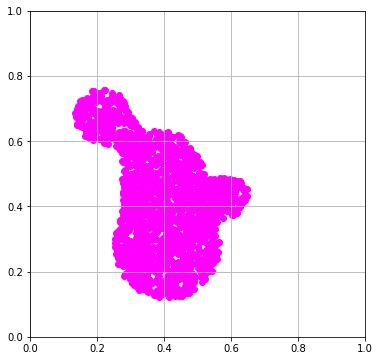

In [23]:
n = 4
a = .3
g,s = ensalea(n,a,1)

###  4.

In [24]:
def echant(l,g,s):
    x = np.random.uniform(0,1,(l,2))
    y = (f(x,g,s) > 1/2)*1*2 -1
    return x,y

###  5.

In [25]:
def estens(x,y,p):
    X1 = x[:,0]
    X2 = x[:,1]
    Lm = np.zeros((p,p))
    Lp = np.zeros((p,p))
    l = len(X1)
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        Lm[i,j] += (y[k] == -1)*1
        Lp[i,j] += (y[k] == 1)*1
    B = (Lp > Lm) * 1
    Re = 0
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        # correction proposée :
        Re += ((B[i,j] * 2 - 1) != y[k])*1
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
#        if B[i,j] == 1:  # est-ce qu'il ne faut pas aussi regarder là où B(i,j)=0 ?!
#            Re += (y[k] == -1) * 1
#        else:
#            Re += (y[k] == 1) * 1
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
    Re /= l
    return B, Re

Risque empirique : 0.00427


<Figure size 504x504 with 0 Axes>

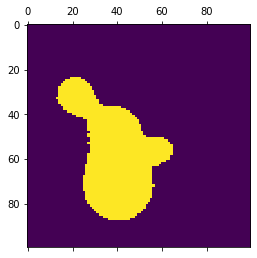

In [26]:
l = 10**5
p = 100
x,y = echant(l,g,s)
B, Re = estens(x,y,p)

plt.figure(figsize=(7,7))
plt.matshow(np.flip(B.T,axis=0));
print("Risque empirique :",Re)

###  6.

In [27]:
def testens(B,m,g,s):
    x_test, y_test = echant(m,g,s)
    p = B.shape[0]
    R = 0
    for k in range(m):
        i = int(p * x_test[k,0])
        j = int(p * x_test[k,1])
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
# ---- rajouter le test en B(i,j)=0   --------------------------------------------------------
# ---- et tester y_test  ---------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
        # correction proposée :
        R += ((B[i,j]*2-1) != y_test[k])*1
        #if B[i,j] == 1:
        #    R += (y_test[k] == -1) * 1
        #else:
        #    R += (y_test[k] == 1) * 1
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
    R /= m
    return R

###  7.

l = 100, p minimisant : 8
l = 500, p minimisant : 11
l = 1000, p minimisant : 16
l = 10000, p minimisant : 43


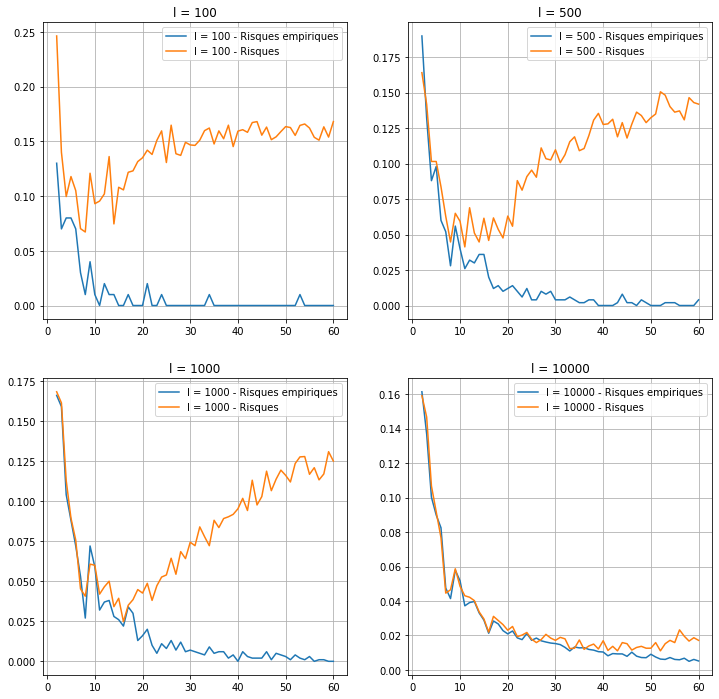

In [29]:
ls = [100, 500, 1000, 10000]
ps = np.arange(2,61)

plt.figure(figsize=(12,12))
m = 4600
p_mins = []

for _1 in range(len(ls)) :
    plt.subplot(2,2,_1+1,title=f'l = {ls[_1]}')
    Res = []
    Rs  = []
    for _2 in range(len(ps)) :
        x_train,y_train = echant(ls[_1],g,s)
        B, Re = estens(x_train,y_train,ps[_2])
        R = testens(B,m,g,s)
        Res.append(Re)
        Rs.append(R)
    p_mins.append(ps[np.argmin(Rs)])
        
    plt.plot(ps,Res, label=f'l = {ls[_1]} - Risques empiriques')
    plt.plot(ps,Rs,  label=f'l = {ls[_1]} - Risques')

    plt.grid();
    plt.legend();
    
for i in range(4):
    print(f"l = {ls[i]}, p minimisant : {p_mins[i]}")

**Commentaires :**
- > Pour $l$ fixé, la courbe de risque empirique décroît et tend vers 0, la courbe de risque décroît puis croît. 
- > Lorsque $l$ augmente, le $\hat{p}$ minimiseur augmente.
- > Pour $p$ fixé, le risque empirique croît lorsque $l$ augmente. Rq : bizarre dans la question on parle du risque empirique de indicatrice de $\hat{C}_{\hat{p}}$, puis on dit à $p$ fixé... J'AI COMPRIS : le risque optimal diminue lorsque $l$ augmente, c'est ça qu'il faut dire !

**En particulier, cette expérience illustre :**
- > Plus l'on a de données d'apprentissage ($l$ est grand), plus le modèle doit être complexe ($p$ augmente) afin de minimiser le risque.
- > 